<a href="https://colab.research.google.com/github/CleonKalea/Foundation-of-Data-Science/blob/master/Tugas%201/Exploratory%20Data%20Analysis%20-%202021%20Salary%20Survey.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Exploratory Data Analysis using Salary Survey 2021 Data**

# Install and Import Required Library

In [1]:
!pip install forex_python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.9/137.9 kB 614.9 kB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
from forex_python.converter import CurrencyRates
import matplotlib.pyplot as plt

# Prepare the Data

Import the Data into Pandas DataFrame

In [3]:
# URL to 2021 Salary Survey Data (Excel)
data_url = 'https://github.com/CleonKalea/Foundation-of-Data-Science/raw/master/Tugas%201/salary_survey_2021.xlsx'

# Load the Excel file and convert its contents into a DataFrame
original_df = pd.read_excel(data_url)

# Show the DataFrame
original_df

,Timestamp,How old are you?,What industry do you work in?,Job title,"If your job title needs additional context, please clarify here:","What is your annual salary? (You'll indicate the currency in a later question. If you are part-time or hourly, please enter an annualized equivalent -- what you would earn if you worked the job 40 hours a week, 52 weeks a year.)","How much additional monetary compensation do you get, if any (for example, bonuses or overtime in an average year)? Please only include monetary compensation here, not the value of benefits.",Please indicate the currency,"If ""Other,"" please indicate the currency here:","If your income needs additional context, please provide it here:",What country do you work in?,"If you're in the U.S., what state do you work in?",What city do you work in?,How many years of professional work experience do you have overall?,How many years of professional work experience do you have in your field?,What is your highest level of education completed?,What is your gender?,What is your race? (Choose all that apply.)
0,2021-04-27 11:02:09.743,25-34,Education (Higher Education),Research and Instruction Librarian,NaN,55000,0.0,USD,NaN,NaN,United States,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,White
1,2021-04-27 11:02:21.562,25-34,Computing or Tech,Change & Internal Communications Manager,NaN,54600,4000.0,GBP,NaN,NaN,United Kingdom,NaN,Cambridge,8 - 10 years,5-7 years,College degree,Non-binary,White
2,2021-04-27 11:02:38.125,25-34,"Accounting, Banking & Finance",Marketing Specialist,NaN,34000,NaN,USD,NaN,NaN,US,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White
3,2021-04-27 11:02:40.643,25-34,Nonprofits,Program Manager,NaN,62000,3000.0,USD,NaN,NaN,USA,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,White
4,2021-04-27 11:02:41.793,25-34,"Accounting, Banking & Finance",Accounting Manager,NaN,60000,7000.0,USD,NaN,NaN,US,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman,White
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27941,2023-02-27 06:22:35.240,25-34,Computing or Tech,Sr software engineer,NaN,190000,14000.0,USD,NaN,NaN,United States,Texas,Dallas,5-7 years,5-7 years,College degree,Man,Asian or Asian American
27942,2023-03-01 09:43:37.098,45-54,Property or Construction,Property Manager,Senior,55000,13000.0,USD,NaN,NaN,United States,Ohio,Brunswick,21 - 30 years,11 - 20 years,NaN,NaN,NaN
27943,2023-03-06 18:16:18.899,25-34,Behavioral Health,Mental Health Therapist,NaN,52416,NaN,USD,NaN,NaN,USA,Virginia,Spotsylvania,2 - 4 years,2 - 4 years,Master's degree,Woman,White
27944,2023-03-09 09:11:48.506,18-24,Computing or Tech,Help Desk Associate Analyst,NaN,36000,NaN,USD,NaN,NaN,United States,Illinois,Chicago,5-7 years,2 - 4 years,College degree,Man,Black or African American


Rename the Necessary Original DataFrame Columns to Shorten the Syntax

In [20]:
original_df = original_df.rename(columns={"What is your annual salary? (You\'ll indicate the currency in a later question. If you are part-time or hourly, please enter an annualized equivalent -- what you would earn if you worked the job 40 hours a week, 52 weeks a year.)": 'Annual Salary',
                        "How much additional monetary compensation do you get, if any (for example, bonuses or overtime in an average year)? Please only include monetary compensation here, not the value of benefits." : "Monetary Compensation",
                        "What industry do you work in?" : "Industry",
                        "How many years of professional work experience do you have overall?" : "Work Experience Overall",
                        "How many years of professional work experience do you have in your field?" : "Work Experience in the same Field",
                        "What is your gender?" : "Gender",
                        "What is your highest level of education completed?" : "Education",
                        "Please indicate the currency" : "Currency",
                        "If \"Other,\" please indicate the currency here: " : "Other Currency",
                        "What country do you work in?" : "Country"})

original_df.iloc[0]

Timestamp                                                                   2021-04-27 11:02:09.743000
How old are you?                                                                                 25-34
Industry                                                                  Education (Higher Education)
Job title                                                           Research and Instruction Librarian
If your job title needs additional context, please clarify here:                                   NaN
Annual Salary                                                                                    55000
Monetary Compensation                                                                              0.0
Currency                                                                                           USD
Other Currency                                                                                     NaN
If your income needs additional context, please provide it here:         

Create a new DataFrame with only the necessary columns

In [21]:
salary_survey_df = pd.DataFrame(columns=['Industry', 'Job Title', 'Work Experience Overall', 'Work Experience in the same Field', 'Country', 'Gender', 'Education', 'Total Salary', 'Currency'])
salary_survey_df

,Industry,Work Experience Overall,Work Experience in the same Field,Country,Gender,Education,Total Salary,Currency


Copy Necessary Columns Value from Original DataFrame into `salary_survey_df`

In [37]:
# Get Rows Length to Iterate
total_rows = original_df.shape[0]

# Copy Data from Original DataFrame
for i in range(total_rows):
  industry = original_df.loc[i, 'Industry']
  work_experience_overall = original_df.loc[i, 'Work Experience Overall']
  work_experience_in_the_same_field = original_df.loc[i, 'Work Experience in the same Field']
  annual_salary = original_df.loc[i, 'Annual Salary']
  monetary_compensation = original_df.loc[i, 'Monetary Compensation']
  country = original_df.loc[i, 'Country']
  currency = original_df.loc[i, 'Currency']
  gender = original_df.loc[i, 'Gender']
  education = original_df.loc[i, 'Education']

  # Set Monetary Compensation to 0 if Value is NaN
  if np.isnan(monetary_compensation):
      monetary_compensation = 0.0
  else:
      monetary_compensation = monetary_compensation

  # Sum Annual Salary and Monetary Compensation
  total_salary = annual_salary + monetary_compensation

  # Insert Data to the New DataFrame
  salary_survey_df.loc[i, 'Industry'] = industry
  salary_survey_df.loc[i, 'Work Experience Overall'] = work_experience_overall
  salary_survey_df.loc[i, 'Work Experience in the same Field'] = work_experience_in_the_same_field
  salary_survey_df.loc[i, 'Total Salary'] = total_salary
  salary_survey_df.loc[i, 'Country'] = country
  salary_survey_df.loc[i, 'Currency'] = currency
  salary_survey_df.loc[i, 'Gender'] = gender
  salary_survey_df.loc[i, 'Education'] = education

  print(i)

salary_survey_df

Streaming output truncated to the last 5000 lines.
22946
22947
22948
22949
22950
22951
22952
22953
22954
22955
22956
22957
22958
22959
22960
22961
22962
22963
22964
22965
22966
22967
22968
22969
22970
22971
22972
22973
22974
22975
22976
22977
22978
22979
22980
22981
22982
22983
22984
22985
22986
22987
22988
22989
22990
22991
22992
22993
22994
22995
22996
22997
22998
22999
23000
23001
23002
23003
23004
23005
23006
23007
23008
23009
23010
23011
23012
23013
23014
23015
23016
23017
23018
23019
23020
23021
23022
23023
23024
23025
23026
23027
23028
23029
23030
23031
23032
23033
23034
23035
23036
23037
23038
23039
23040
23041
23042
23043
23044
23045
23046
23047
23048
23049
23050
23051
23052
23053
23054
23055
23056
23057
23058
23059
23060
23061
23062
23063
23064
23065
23066
23067
23068
23069
23070
23071
23072
23073
23074
23075
23076
23077
23078
23079
23080
23081
23082
23083
23084
23085
23086
23087
23088
23089
23090
23091
23092
23093
23094
23095
23096
23097
23098
23099
23100
23101
23102
23103
2

,Industry,Work Experience Overall,Work Experience in the same Field,Country,Gender,Education,Total Salary,Currency,Job Title
0,Education (Higher Education),5-7 years,5-7 years,United States,Woman,Master's degree,55000.0,USD,Research and Instruction Librarian
1,Computing or Tech,8 - 10 years,5-7 years,United Kingdom,Non-binary,College degree,58600.0,GBP,Change & Internal Communications Manager
2,"Accounting, Banking & Finance",2 - 4 years,2 - 4 years,US,Woman,College degree,34000.0,USD,Marketing Specialist
3,Nonprofits,8 - 10 years,5-7 years,USA,Woman,College degree,65000.0,USD,Program Manager
4,"Accounting, Banking & Finance",8 - 10 years,5-7 years,US,Woman,College degree,67000.0,USD,Accounting Manager
...,...,...,...,...,...,...,...,...,...
27941,Computing or Tech,5-7 years,5-7 years,United States,Man,College degree,204000.0,USD,Sr software engineer
27942,Property or Construction,21 - 30 years,11 - 20 years,United States,NaN,NaN,68000.0,USD,Property Manager
27943,Behavioral Health,2 - 4 years,2 - 4 years,USA,Woman,Master's degree,52416.0,USD,Mental Health Therapist
27944,Computing or Tech,5-7 years,2 - 4 years,United States,Man,College degree,36000.0,USD,Help Desk Associate Analyst


In [56]:
# df.columns
# group_result = original_df['Industry'].value_counts().reset_index()
# group_result = original_df['Work Experience Overall'].value_counts().reset_index()
# group_result = original_df['Work Experience in the same Field'].value_counts().reset_index()
# group_result = original_df['Gender'].value_counts().reset_index()
# group_result = original_df['Education'].value_counts().reset_index()
group_result = original_df['Currency'].value_counts().reset_index()
# group_result = original_df['Other Currency'].value_counts().reset_index()
print(group_result.to_string())

      index  Currency
0       USD     23288
1       CAD      1665
2       GBP      1585
3       EUR       637
4   AUD/NZD       500
5     Other       156
6       CHF        37
7       SEK        37
8       JPY        23
9       ZAR        14
10      HKD         4


# **Data Cleaning**

**Checking Null Values**

In [45]:
salary_survey_df.isna().sum()

Industry                               0
Work Experience Overall                0
Work Experience in the same Field      0
Country                                0
Gender                                 0
Education                            211
Total Salary                           0
Currency                               0
Job Title                              0
dtype: int64

**Cleaning Industry Data Values by Dropping Null Value**

In [42]:
null_industry_rows = salary_survey_df[salary_survey_df['Industry'].isna()]['Industry'].index
salary_survey_df.drop(null_industry_rows, inplace=True)

**Cleaning Gender Values**

In [49]:
# Scanning Unique Values in Gender
salary_survey_df['Gender'].unique()

array(['Woman', 'Non-binary', 'Man', 'Prefer not to answer',
       'Other or prefer not to answer'], dtype=object)

In [50]:
# Filling Null Columns with "Prefer not to answer"
salary_survey_df['Gender'] = salary_survey_df['Gender'].fillna('Prefer not to answer')

**Cleaning Education Values**

In [51]:
# Scanning Unique Values in Education
salary_survey_df['Education'].unique()

array(["Master's degree", 'College degree', 'PhD', nan, 'Some college',
       'High School', 'Professional degree (MD, JD, etc.)'], dtype=object)

In [53]:
# Filling Null Columns with "-"
salary_survey_df['Education'] = salary_survey_df['Education'].fillna('-')

**Cleaning Currency Values**

In [55]:
# Scanning Unique Values in Currency
salary_survey_df['Currency'].unique()

array(['USD', 'GBP', 'CAD', 'EUR', 'AUD/NZD', 'Other', 'CHF', 'ZAR',
       'SEK', 'HKD', 'JPY'], dtype=object)

In [57]:
# Value of Each Unique Currency
group_result = original_df['Currency'].value_counts().reset_index()
print(group_result.to_string())

      index  Currency
0       USD     23288
1       CAD      1665
2       GBP      1585
3       EUR       637
4   AUD/NZD       500
5     Other       156
6       CHF        37
7       SEK        37
8       JPY        23
9       ZAR        14
10      HKD         4


In [59]:
# Rename AUD/NZD Currency to AUD
salary_survey_df['Currency'] = salary_survey_df['Currency'].replace("AUD/NZD", "AUD")

# Drop Rows with "Other" Currency Value
other_currency_rows = salary_survey_df[salary_survey_df['Currency'] == "Other"]['Currency'].index
salary_survey_df.drop(other_currency_rows, inplace=True)

null_total_salary_rows = salary_survey_df[salary_survey_df['Total Salary (USD)'].isna()]['Industry'].index
salary_survey_df.drop(null_industry_rows, inplace=True)

In [61]:
# Initialize CurrencyRates object
c = CurrencyRates()

# Get all supported currencies with exchange rates relative to USD
all_currencies = c.get_rates('USD')

# Include USD in the dictionary with a value of 1
all_currencies['USD'] = 1.0

# Store the currencies and their exchange rates in a dictionary
exchange_rates = all_currencies

# Print the dictionary
for key, value in exchange_rates.items():
    print(key, value)

EUR 0.9286775631500743
JPY 150.33432392273403
BGN 1.8163075780089153
CZK 23.64413075780089
DKK 6.922919762258544
GBP 0.794994427934621
HUF 361.3763001485884
PLN 4.030460624071322
RON 4.622121099554235
SEK 10.462017087667162
CHF 0.8814078751857356
ISK 138.46582466567608
NOK 10.545598068350667
TRY 30.827544576523028
AUD 1.5338967310549776
BRL 4.973161218424963
CAD 1.348254086181278
CNY 7.193629271916791
HKD 7.8228083209509665
IDR 15636.497028231799
INR 83.00659361069837
KRW 1332.73588410104
MXN 17.044576523031203
MYR 4.780460624071322
NZD 1.638930163447251
PHP 55.96025260029718
SGD 1.3465824665676076
THB 36.059621099554235
ZAR 18.886979940564636
USD 1.0


In [65]:
for i in range(salary_survey_df.shape[0]):
  currency = salary_survey_df.loc[i, 'Currency']
  print(currency, i)

  if currency in exchange_rates:
      converted_total_salary_to_USD = salary_survey_df.loc[i, "Total Salary"] / exchange_rates[currency]
      salary_survey_df.loc[i, 'Total Salary (USD)'] = converted_total_salary_to_USD
      print(f'{salary_survey_df.loc[i, "Total Salary"]} {currency} --> {converted_total_salary_to_USD} USD')
  else:
      salary_survey_df.loc[i, 'Total Salary (USD)'] = np.nan
      print(f" {i} --> Conversion rate for {currency} to USD is not available. Skipping conversion.")


USD 0
55000.0 USD --> 55000.0 USD
GBP 1
58600.0 GBP --> 73711.20845744992 USD
USD 2
34000.0 USD --> 34000.0 USD
USD 3
65000.0 USD --> 65000.0 USD
USD 4
67000.0 USD --> 67000.0 USD
USD 5
62000.0 USD --> 62000.0 USD
USD 6
35000.0 USD --> 35000.0 USD
USD 7
50000.0 USD --> 50000.0 USD
USD 8
122000.0 USD --> 122000.0 USD
USD 9
45000.0 USD --> 45000.0 USD
USD 10
47500.0 USD --> 47500.0 USD
USD 11
62000.0 USD --> 62000.0 USD
USD 12
100000.0 USD --> 100000.0 USD
USD 13
52000.0 USD --> 52000.0 USD
CAD 14
32000.0 CAD --> 23734.39867750379 USD
GBP 15
24500.0 GBP --> 30817.826061561827 USD
USD 16
90000.0 USD --> 90000.0 USD
USD 17
59000.0 USD --> 59000.0 USD
USD 18
99000.0 USD --> 99000.0 USD
USD 19
54000.0 USD --> 54000.0 USD
USD 20
74000.0 USD --> 74000.0 USD
USD 21
50000.0 USD --> 50000.0 USD
CAD 22
63000.0 CAD --> 46727.09739633558 USD
USD 23
97000.0 USD --> 97000.0 USD
USD 24
44500.0 USD --> 44500.0 USD
USD 25
60000.0 USD --> 60000.0 USD
USD 26
62000.0 USD --> 62000.0 USD
USD 27
52000.0 USD -

KeyError: 360

In [68]:
salary_survey_df.iloc[360]

Industry                                          Health care
Work Experience Overall                             5-7 years
Work Experience in the same Field                   5-7 years
Country                              United States of America
Gender                                                  Woman
Education                                                 PhD
Total Salary                                         125500.0
Currency                                                  USD
Job Title                                          Pharmacist
Total Salary (USD)                                        NaN
Name: 361, dtype: object

In [ ]:
latihan_df['Total Salary (USD)']

0             55000.0
1        73711.208457
2             34000.0
3             65000.0
4             67000.0
             ...     
27941        204000.0
27942         68000.0
27943         52416.0
27944         36000.0
27945         60000.0
Name: Total Salary (USD), Length: 27946, dtype: object

In [ ]:
# Boolean indexing to find rows where the value matches
latihan_df = latihan_df.drop(latihan_df[latihan_df['Total Salary'] == 102000000].index)

In [ ]:
# Convert 'Total Salary (USD)' column to numeric values
latihan_df['Total Salary (USD)'] = pd.to_numeric(latihan_df['Total Salary (USD)'], errors='coerce')


In [ ]:
latihan_df['Total Salary (USD)'] = latihan_df['Total Salary (USD)'].round(1)

In [ ]:
# Find the index of the maximum value in the "Total Salary" column
max_index = latihan_df['Total Salary (USD)'].idxmax()

# Get the corresponding value in the "Industry" column using the index
max_industry = latihan_df.loc[max_index, 'Industry']

max_salary = latihan_df.loc[max_index, 'Total Salary (USD)']

print(max_index)
print("Industry with maximum Total Salary:", max_industry)
max_salary

26466
Industry with maximum Total Salary: Sales


5004044.0

In [ ]:
print(latihan_df['Total Salary (USD)'])

0         55000.0
1         46586.7
2         34000.0
3         65000.0
4         67000.0
           ...   
27941    204000.0
27942     68000.0
27943     52416.0
27944     36000.0
27945     60000.0
Name: Total Salary (USD), Length: 27945, dtype: float64


In [ ]:
# Boolean indexing to find rows where the value matches
result = latihan_df.iloc[max_index-1]

# Print the result
print(result)

Industry                                       Sales
Work Experience Overall                31 - 40 years
Work Experience in the same Field      21 - 30 years
Gender                                         Woman
Education                            Master's degree
Currency                                         USD
Total Salary                               5004044.0
Total Salary (USD)                         5004044.0
Name: 26466, dtype: object


In [ ]:
max_salary_by_industry = latihan_df.groupby('Industry')['Total Salary (USD)'].max().reset_index()
min_salary_by_industry = latihan_df.groupby('Industry')['Total Salary (USD)'].min().reset_index()

print(max_salary_by_industry)
print(min_salary_by_industry)

                                Industry  Total Salary (USD)
0                                  Buyer             78950.0
1                    Veterinary medicine            155000.0
2     "Government Relations" (Lobbying)              65000.0
3                               Academia             66115.5
4                              Academia              28000.0
...                                  ...                 ...
1204        trade association/membership             67100.0
1205                         translation                 NaN
1206                  veterinary biotech             99000.0
1207                         video games             28602.9
1208              wholesale distribution            150006.0

[1209 rows x 2 columns]
                                Industry  Total Salary (USD)
0                                  Buyer             78950.0
1                    Veterinary medicine            155000.0
2     "Government Relations" (Lobbying)              65000.0

In [ ]:
def extract_work_experience(exp_str):
    if '-' in exp_str:
        exp_values = exp_str.split('-')
        second_part = exp_values[1].split()[0]  # Remove any non-numeric characters
        return (int(exp_values[0]) + int(second_part)) / 2  # Taking average for range
    elif 'years' in exp_str:
        exp_values = exp_str.split(' ')
        return int(exp_values[0])
    else:
        return int(exp_str.split()[0])

In [ ]:
latihan_df['Work Experience Numeric'] = latihan_df['Work Experience Overall'].apply(extract_work_experience)

In [ ]:
work_salary_correlation = latihan_df['Work Experience Numeric'].corr(latihan_df['Total Salary (USD)'])

print("Korelasi Pengalaman Kerja dengan Gaji:", work_salary_correlation)

Korelasi Pengalaman Kerja dengan Gaji: 0.14224094256770892


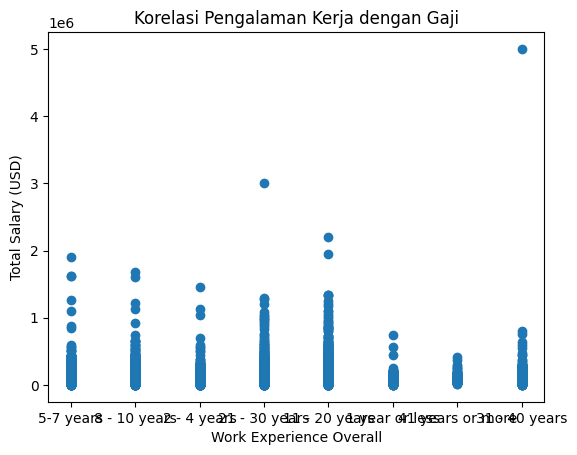

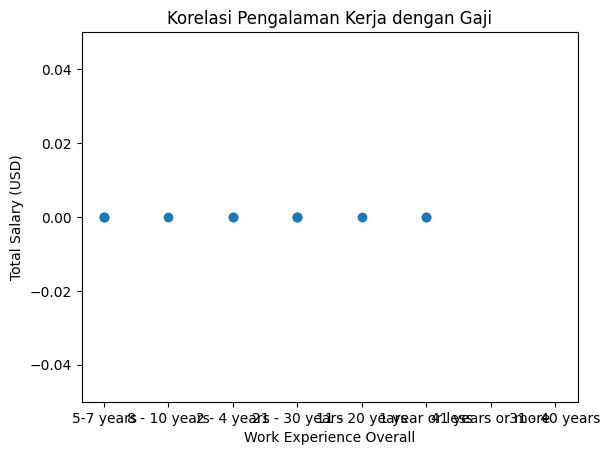

In [ ]:
plt.scatter(latihan_df['Work Experience Overall'], latihan_df['Total Salary (USD)'])
plt.xlabel('Work Experience Overall')
plt.ylabel('Total Salary (USD)')
plt.title('Korelasi Pengalaman Kerja dengan Gaji')
plt.show()

plt.scatter(latihan_df['Work Experience Overall'], latihan_df['Total Salary (USD)'])
plt.xlabel('Work Experience Overall')
plt.ylabel('Total Salary (USD)')
plt.title('Korelasi Pengalaman Kerja dengan Gaji')
plt.ylim(bottom=-0.05, top=0.05)
plt.show()

In [ ]:
# Check for missing values in the "Gender" column
missing_indices = df.index[df['Gender'].isna()].tolist()

# Print the indices of missing values in the "Gender" column
if missing_indices:
    print("Missing values in the 'Gender' column at indices:", missing_indices)

print(latihan_df.iloc[171])

Missing values in the 'Gender' column at indices: [171, 490, 537, 647, 658, 773, 1087, 1269, 1584, 1794, 1960, 2125, 2213, 2353, 2663, 3043, 3143, 3251, 3800, 4203, 4324, 4360, 4750, 5027, 5337, 5496, 5594, 5677, 5881, 6446, 6638, 6784, 6794, 7226, 7595, 7691, 7748, 8002, 8058, 8137, 8440, 8469, 8769, 9019, 9148, 9767, 9914, 9947, 10223, 10639, 10706, 10777, 11053, 11162, 11208, 11500, 11915, 12226, 12504, 12634, 12770, 13004, 13148, 13492, 13581, 13659, 13928, 14061, 14103, 14257, 14273, 14373, 14765, 14790, 15087, 15144, 15424, 15489, 15534, 15574, 15764, 16043, 16058, 16145, 16421, 16542, 16708, 17353, 17354, 17428, 17533, 17553, 17554, 17884, 17909, 17985, 18012, 18478, 18720, 18813, 18893, 18902, 18966, 19023, 19055, 19565, 19631, 19882, 20087, 20242, 20292, 20775, 21029, 21342, 21686, 21726, 21924, 21940, 22083, 22115, 22199, 22299, 22493, 22507, 22586, 22791, 22928, 23212, 23279, 23306, 23326, 23396, 23429, 23521, 23530, 23713, 23957, 24258, 24347, 24710, 24878, 24922, 25051, 25

In [ ]:
latihan_df['Gender in Numeric'] = pd.factorize(latihan_df['Gender'])[0]

In [ ]:
gender_salary_correlation = latihan_df['Gender in Numeric'].corr(latihan_df['Total Salary (USD)'], method='pearson')

print("Korelasi Jenis Kelamin dengan Gaji:", gender_salary_correlation)

Korelasi Jenis Kelamin dengan Gaji: 0.15200257454756957


In [ ]:
latihan_df['Gender'] = latihan_df['Gender'].astype(str)

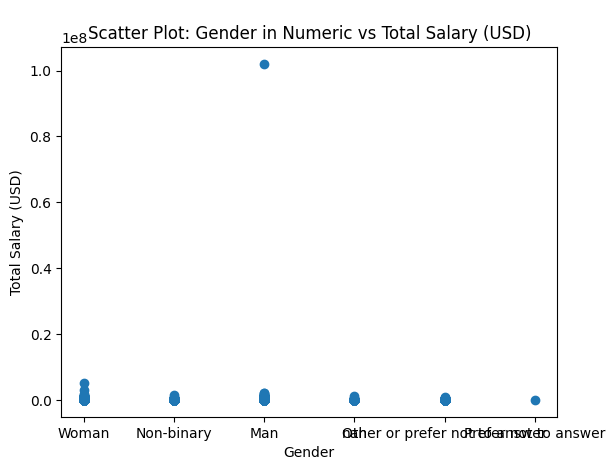

In [ ]:
plt.scatter(latihan_df['Gender'], latihan_df['Total Salary (USD)'])
plt.xlabel('Gender')
plt.ylabel('Total Salary (USD)')
plt.title('Scatter Plot: Gender in Numeric vs Total Salary (USD)')
plt.show()

In [ ]:
# Check for missing values in the "Gender" column
missing_indices = df.index[df['Education'].isna()].tolist()

# Print the indices of missing values in the "Gender" column
if missing_indices:
    print("Missing values in the 'Education' column at indices:", missing_indices)

Missing values in the 'Education' column at indices: [13, 24, 192, 241, 659, 736, 894, 1056, 1087, 1136, 1159, 1268, 1286, 1544, 1714, 1794, 1822, 2125, 2471, 2476, 2486, 2586, 2620, 2759, 2983, 3339, 3463, 3831, 3968, 4133, 4198, 4659, 5077, 5418, 5590, 5648, 5866, 5879, 6023, 6037, 6397, 6446, 6638, 6765, 6875, 6878, 6886, 7226, 7259, 7266, 7627, 7989, 8046, 8058, 8207, 8299, 8440, 8469, 8530, 8636, 8719, 8769, 8788, 9329, 9740, 9767, 9987, 11670, 11673, 11683, 11700, 11914, 11970, 12050, 12152, 12590, 12631, 12682, 12777, 12799, 12863, 13263, 13576, 13581, 13778, 14061, 14103, 14166, 14273, 14287, 14358, 14427, 14428, 14554, 14574, 14604, 14626, 14709, 14779, 14833, 14838, 14926, 15087, 15144, 15263, 15304, 15309, 15395, 15414, 15535, 15696, 15774, 15784, 15974, 16132, 16218, 16281, 16502, 16514, 16668, 16693, 16766, 17032, 17059, 17066, 17071, 17292, 17345, 17354, 17374, 17426, 17533, 17554, 17909, 17960, 17991, 18661, 18720, 18814, 18902, 19176, 19408, 19412, 19463, 19565, 19781, 

In [ ]:
latihan_df['Education in Numeric'] = pd.factorize(latihan_df['Education'])[0]

In [ ]:
education_salary_correlation = latihan_df['Education in Numeric'].corr(latihan_df['Total Salary (USD)'], method='pearson')
print("Korelasi Tingkat Pendidikan dengan Gaji:", education_salary_correlation)

Korelasi Tingkat Pendidikan dengan Gaji: 0.06805822242282938


In [ ]:
latihan_df['Education'] = latihan_df['Education'].astype(str)

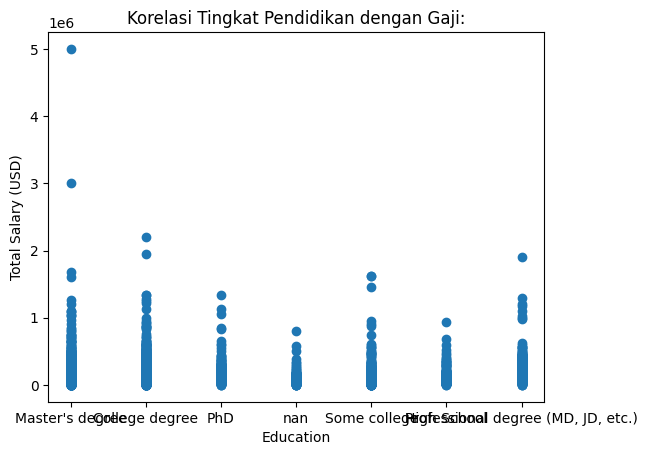

In [ ]:
plt.scatter(latihan_df['Education'], latihan_df['Total Salary (USD)'])
plt.xlabel('Education')
plt.ylabel('Total Salary (USD)')
plt.title('Korelasi Tingkat Pendidikan dengan Gaji:')
plt.show()